Your objective is to delve into the World Happiness Report dataset, which includes columns like Country, Year, Happiness_Score, GDP_per_Capita, Social_Support, Healthy_Life_Expectancy, Freedom_to_Make_Life_Choices, Generosity, and Perceptions_of_Corruption.

    Load and Inspect Data:
        Utilize pandas to load the World Happiness Report Dataset.
        Examine the data to grasp its structure and contents of the year 2019.

    Data Preprocessing:
        Address missing values and adjust data types as necessary.

    Social Support and Happiness:
        Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

    Regional Comparisons of GDP and Health:
        Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
        Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'data_center\2019.csv')

print(df.info())
print(df.head())
min_support_country = df.loc[df['Social support'].idxmin(), 'Country or region']
max_support_country = df.loc[df['Social support'].idxmax(), 'Country or region']

print(min_support_country, max_support_country)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           D

In [ ]:
#Verification des duplicats

print(len(df))
year_data = df.drop_duplicates()
print(len(year_data))

# Pas de duplicats
#Verification des données si null
missing_data = year_data.isnull()
print(missing_data.sum())

#Tout va bien

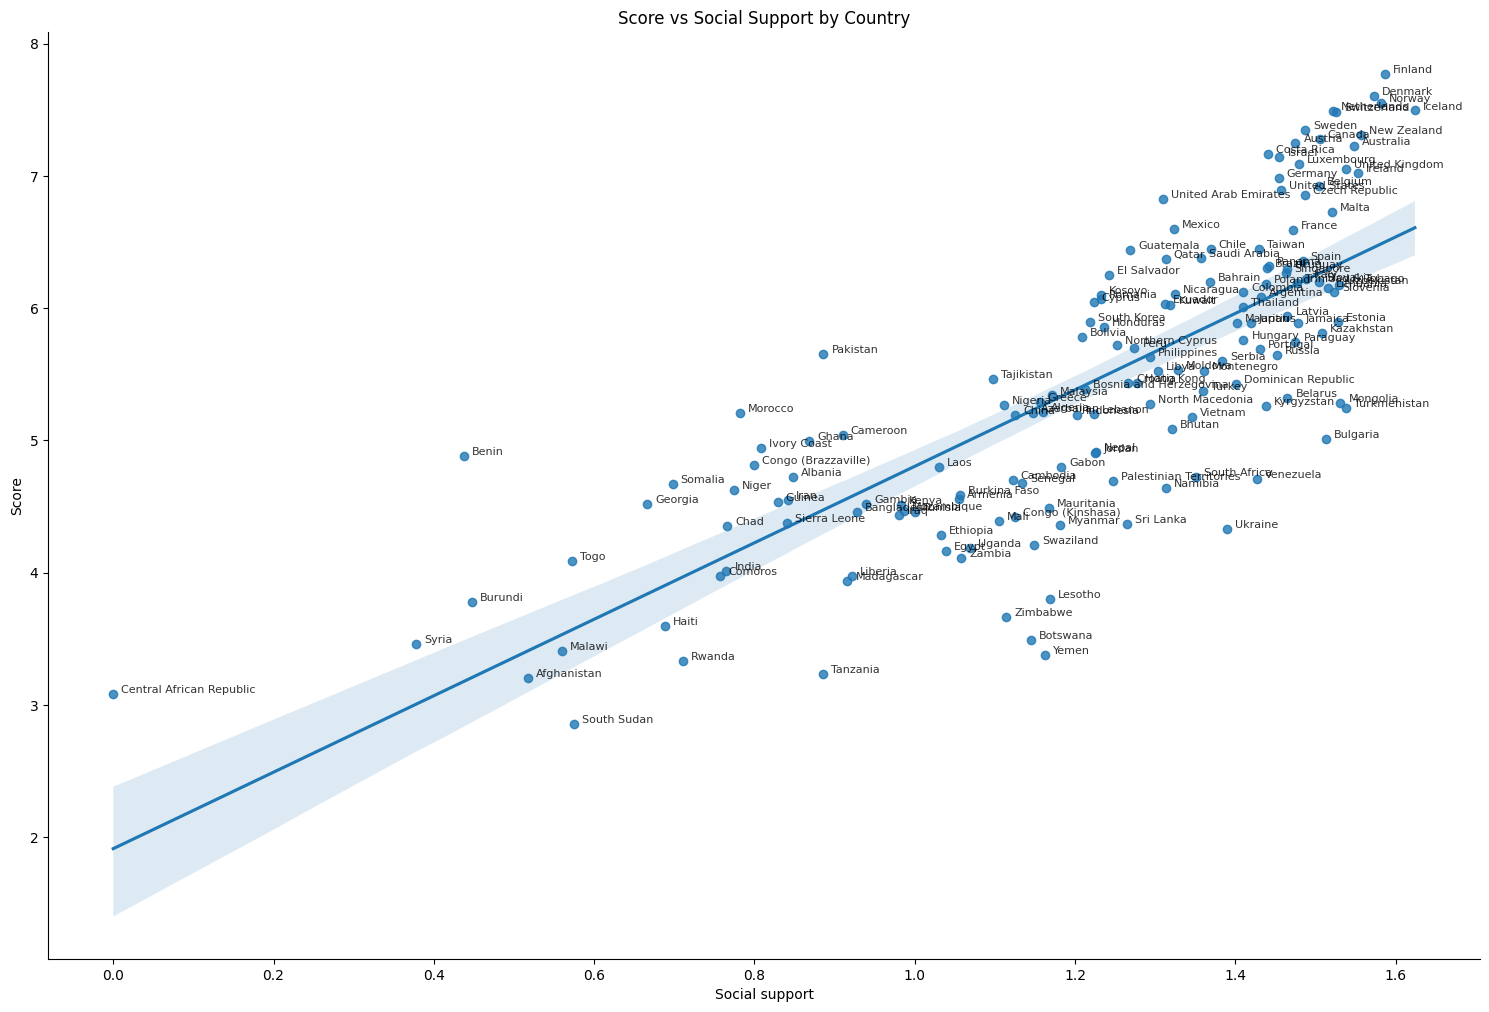

In [28]:
plot = sns.lmplot(x='Social support', y='Score', data=year_data, aspect=1.5, height=10)

ax = plot.ax
for i, row in year_data.iterrows():
    ax.text(row['Social support'] + 0.01, row['Score'] + 0.01, row['Country or region'], fontsize=8, alpha=0.8)
    
plt.title('Score vs Social Support by Country')
plt.show()

In [ ]:
# fig, axs = plt.subplots(2, 1, figsize=(14, 5))  # 2 lignes, 2 colonne

df_sorted_gdp = df.sort_values(by='GDP per capita', ascending=True)

print(df_sorted_gdp[['Country or region', 'GDP per capita']].head(10))

sns.p

            Country or region  GDP per capita
111                   Somalia           0.000
154  Central African Republic           0.026
144                   Burundi           0.046
140                   Liberia           0.073
126          Congo (Kinshasa)           0.094
113                     Niger           0.138
149                    Malawi           0.191
122                Mozambique           0.204
128              Sierra Leone           0.268
141                   Comoros           0.274


C:\Users\alexa\AppData\Local\Temp\ipykernel_17260\3539869565.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right', fontsize=7)


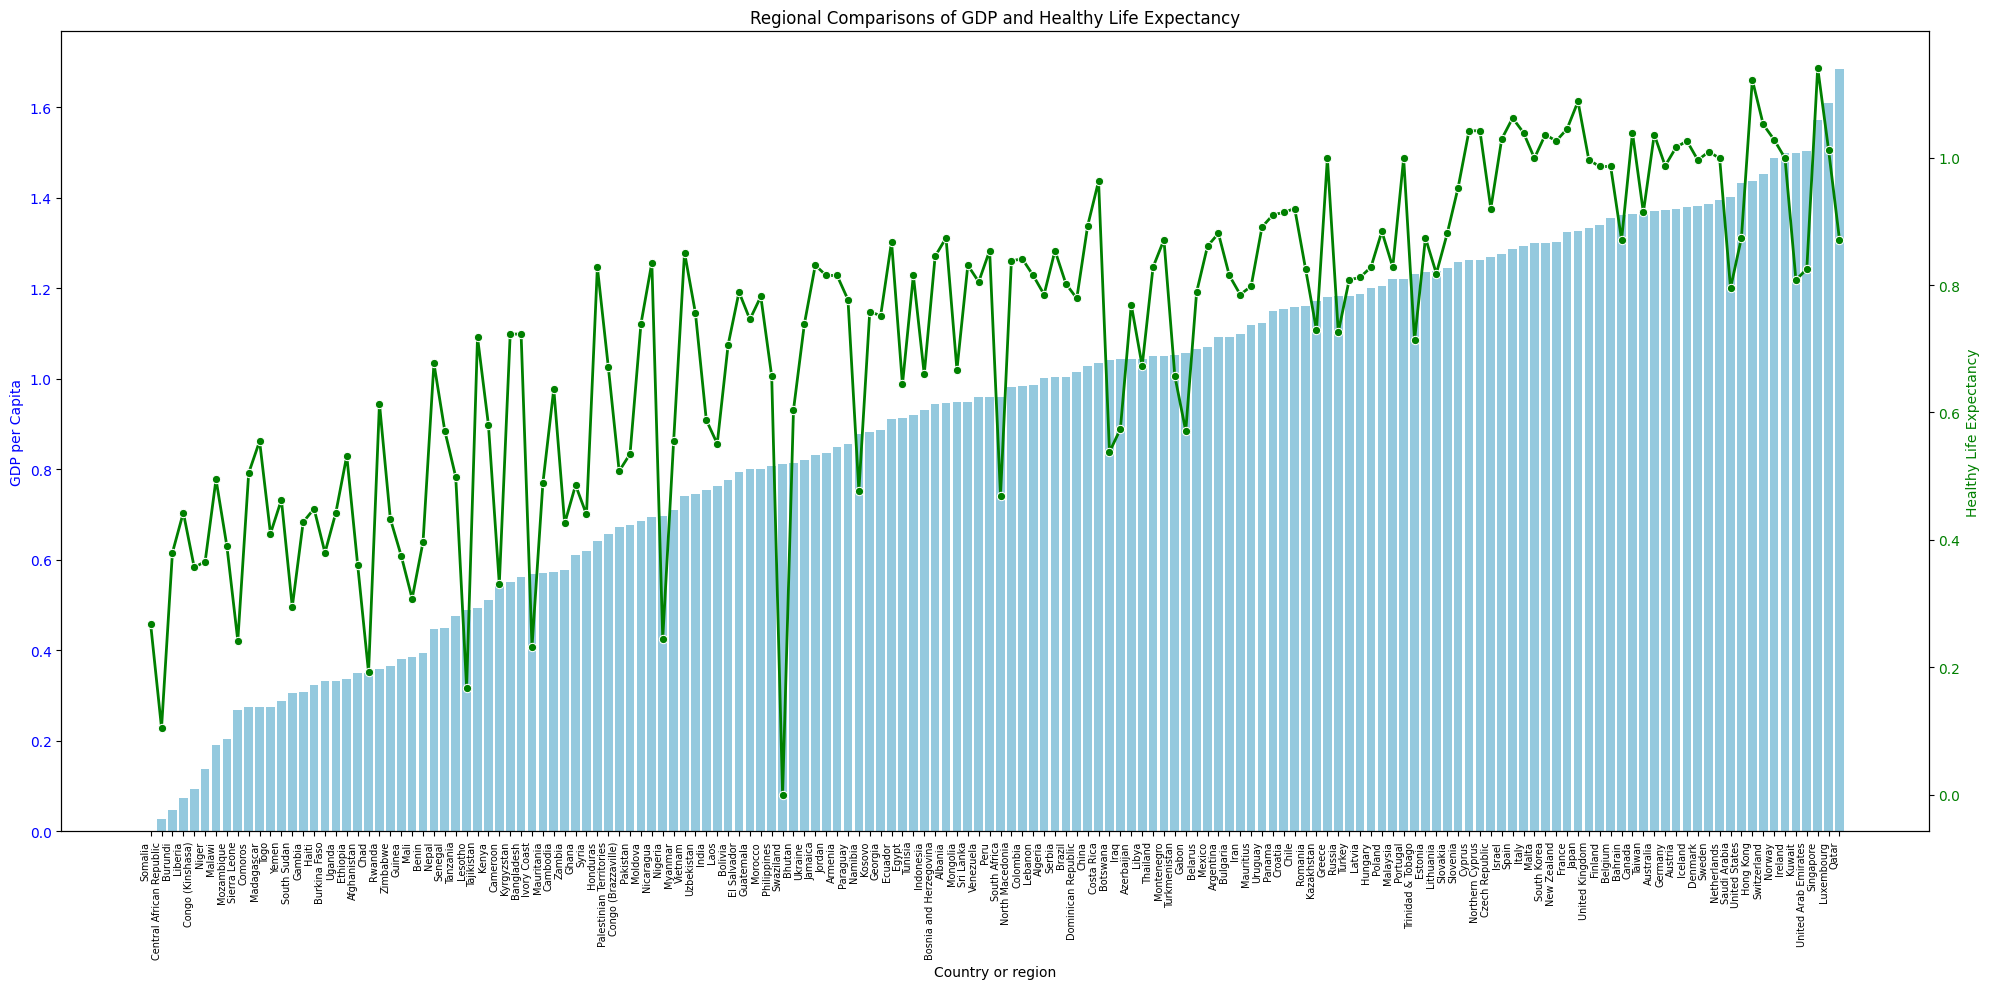

In [44]:
region_data_sort = df.sort_values(by='GDP per capita', ascending=True)

fig, ax1 = plt.subplots(figsize=(20, 10))

# GDP per capita
sns.barplot(data=region_data_sort, x='Country or region', y='GDP per capita', ax=ax1, color='skyblue')
ax1.set_ylabel('GDP per Capita', color='blue')
ax1.set_title('Regional Comparisons of GDP and Healthy Life Expectancy')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right', fontsize=7)

# Créer un deuxième axe Y pour la courbe
ax2 = ax1.twinx()

# Line plot : Healthy life expectancy
sns.lineplot(data=region_data_sort, x='Country or region', y='Healthy life expectancy', ax=ax2, color='green', marker='o', linewidth=2)
ax2.set_ylabel('Healthy Life Expectancy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()